<h2><center>Practical-8</center></h2>
<h2><center>Implement yolo model for object detection</center></h2>
<h3><center>Face and Feature Detection</center></h3>

### * Cloning yolo v5 repository

In [1]:
!git clone https://github.com/ultralytics/yolov5

'git' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
%cd yolov5/

C:\Users\Priyal\yolov5


### * Install required dependencies

In [4]:
!pip install -U -r requirements.txt

### * Import required libraries

In [6]:
import torch
# to display output
from IPython.display import Image, clear_output

clear_output()
print('Setup complete. Using torch %s' % torch.__version__)

Setup complete. Using torch 1.13.0+cpu


### * Spilliting dataset into training and testing sets

In [90]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'D:/FaceDetection/image_dataset/images/train'
valPath = 'D:/FaceDetection/image_dataset/images/val'
crsPath = 'D:/FaceDetection/data/ds/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  114
Validation images are :  28


### * Store splitted training and testing sets at directed path

In [ ]:
trainimagePath = 'D:/FaceDetection/image_dataset/images/train'
trainlabelPath = 'D:/FaceDetection/image_dataset/labels/train'
valimagePath = 'D:/FaceDetection/image_dataset/images/val'
vallabelPath = 'D:/FaceDetection/image_dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

### * Resize images to 320x320

In [106]:
import PIL
import os
import os.path
from PIL import Image

f = r'D:/FaceDetection/image_dataset/images/val'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((320,320))
    img.save(f_img)

### * Train the model & configure custom .yaml file
#### image size: 320x320
#### Batch size: 16
#### Epochs: 70

In [107]:
!python train.py --img 320 --batch 16 --epochs 70 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=70, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v7.0-32-g357cde9 Python-3.9.13 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

## * Results

C:\Users\Priyal\yolov5


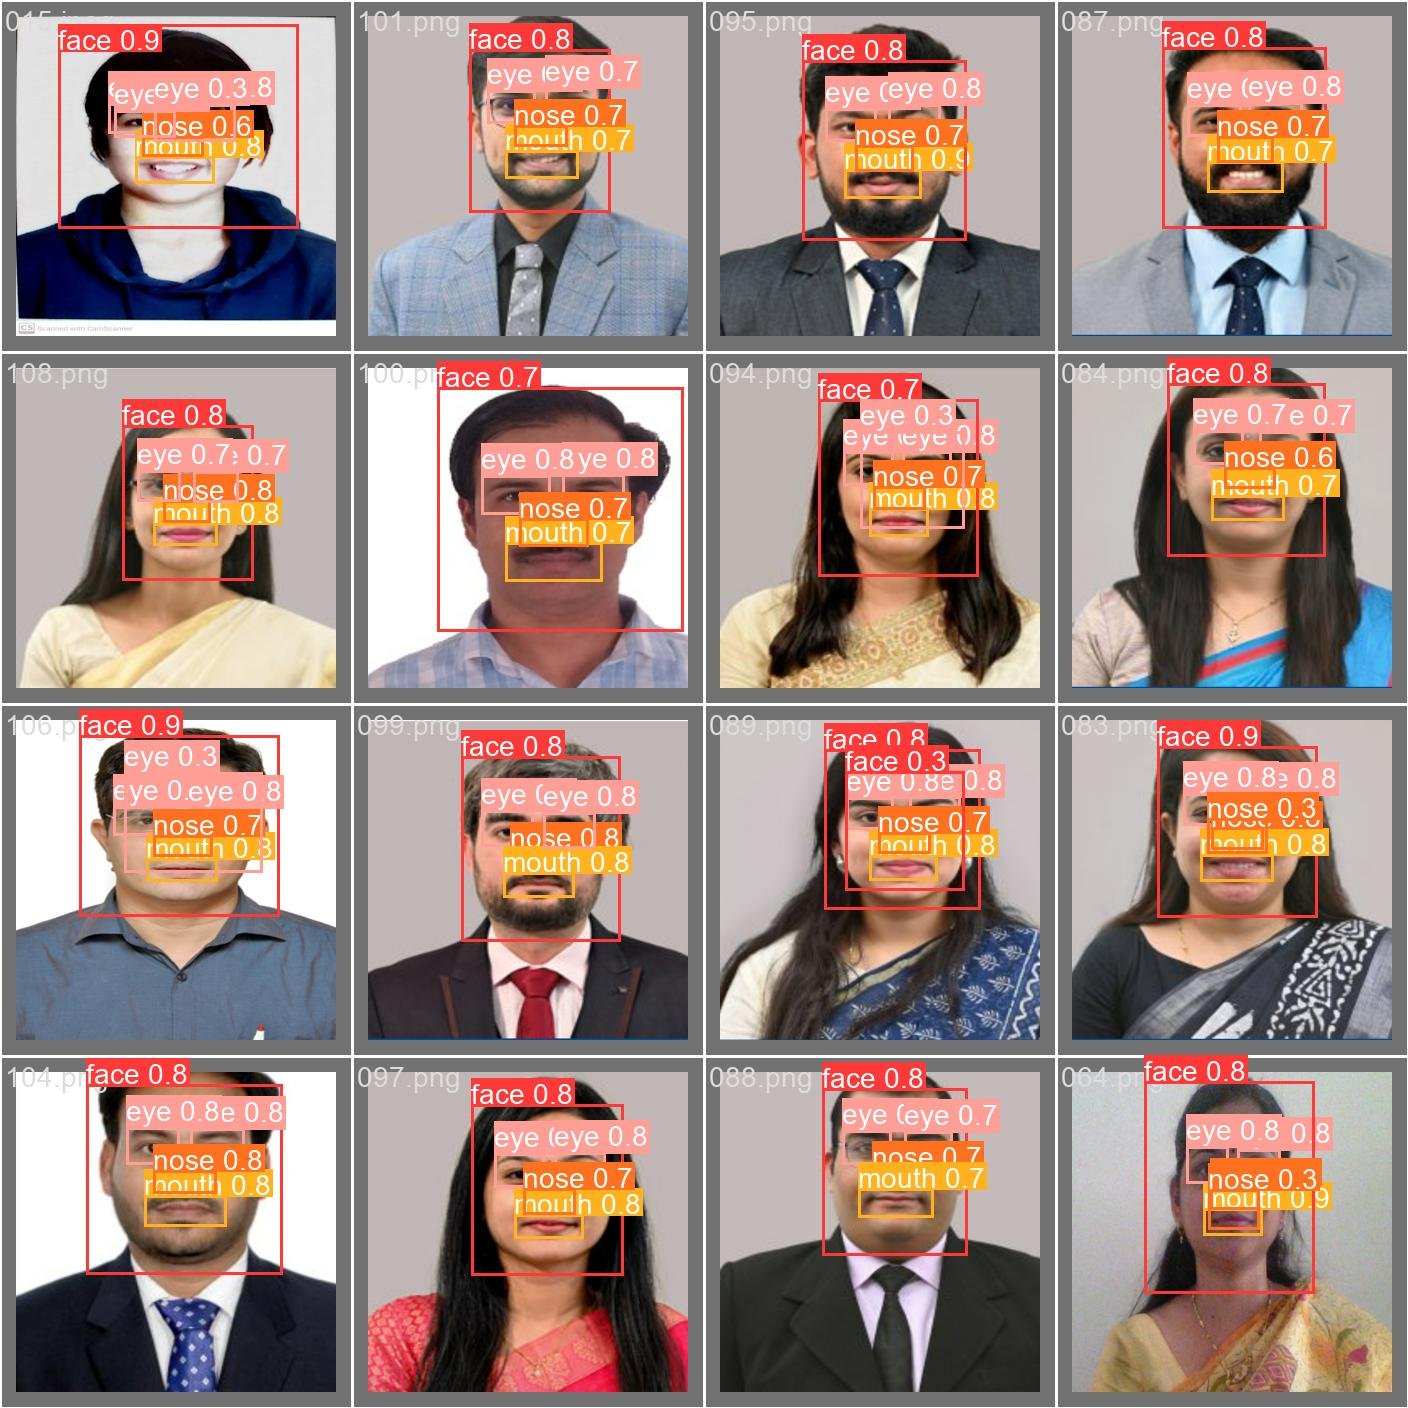

In [4]:
%cd yolov5/

from IPython.display import Image, clear_output
Image(filename='runs/train/exp/val_batch0_pred.jpg', width=1000)

### Implementing the detect.py script with the best.pt weights and image dimentions of 320x320
#### (Results will be stored to runs/detect/exp path)

In [6]:
!python detect.py --source runs/train/exp/test_image.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/test_image.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-32-g357cde9 Python-3.9.13 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\Priyal\yolov5\runs\train\exp\test_image.jpg: 640x640 1 face, 5 eyes, 3 noses, 2 mouths, 144.5ms
Speed: 0.0ms pre-process, 144.5ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp2


In [7]:
!python detect.py --source runs/train/exp/test_image1.png --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/test_image1.png, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-32-g357cde9 Python-3.9.13 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\Priyal\yolov5\runs\train\exp\test_image1.png: 640x640 3 faces, 7 eyes, 3 noses, 3 mouths, 164.0ms
Speed: 1.2ms pre-process, 164.0ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


### Loading trained model

In [45]:
import torch
import cv2
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'runs\train\exp\weights\best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Priyal/.cache\torch\hub\master.zip
YOLOv5  2022-12-15 Python-3.9.13 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### Results on multiple images

In [47]:
images_list=["runs/train/exp/test_image.jpg","runs/detect/exp2/test_image.jpg"]
results_img=["runs/train/exp/test_image1.png", "runs/detect/exp3/test_image1.png"]
for i in images_list:
    results=model(i)
    results_img.append(np.squeeze(results.render()))
PlotImage=[images_list[0],images_list[1],results_img[0],results_img[1]]
plt.figure(figsize=(9,9),dpi=720
for i in range(1,5):
    plt.subplot(2,2,i)
    try:
        img=cv2.imread(PlotImage[i-1])
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    except:
        plt.imshow(PlotImage[i-1])
plt.savefig('Plot.jpg', bbox_inches='tight',dpi=1080)

In [53]:
Image(filename='Plot.jpg', width=700)

## * Interpreting training results and showing loss graph

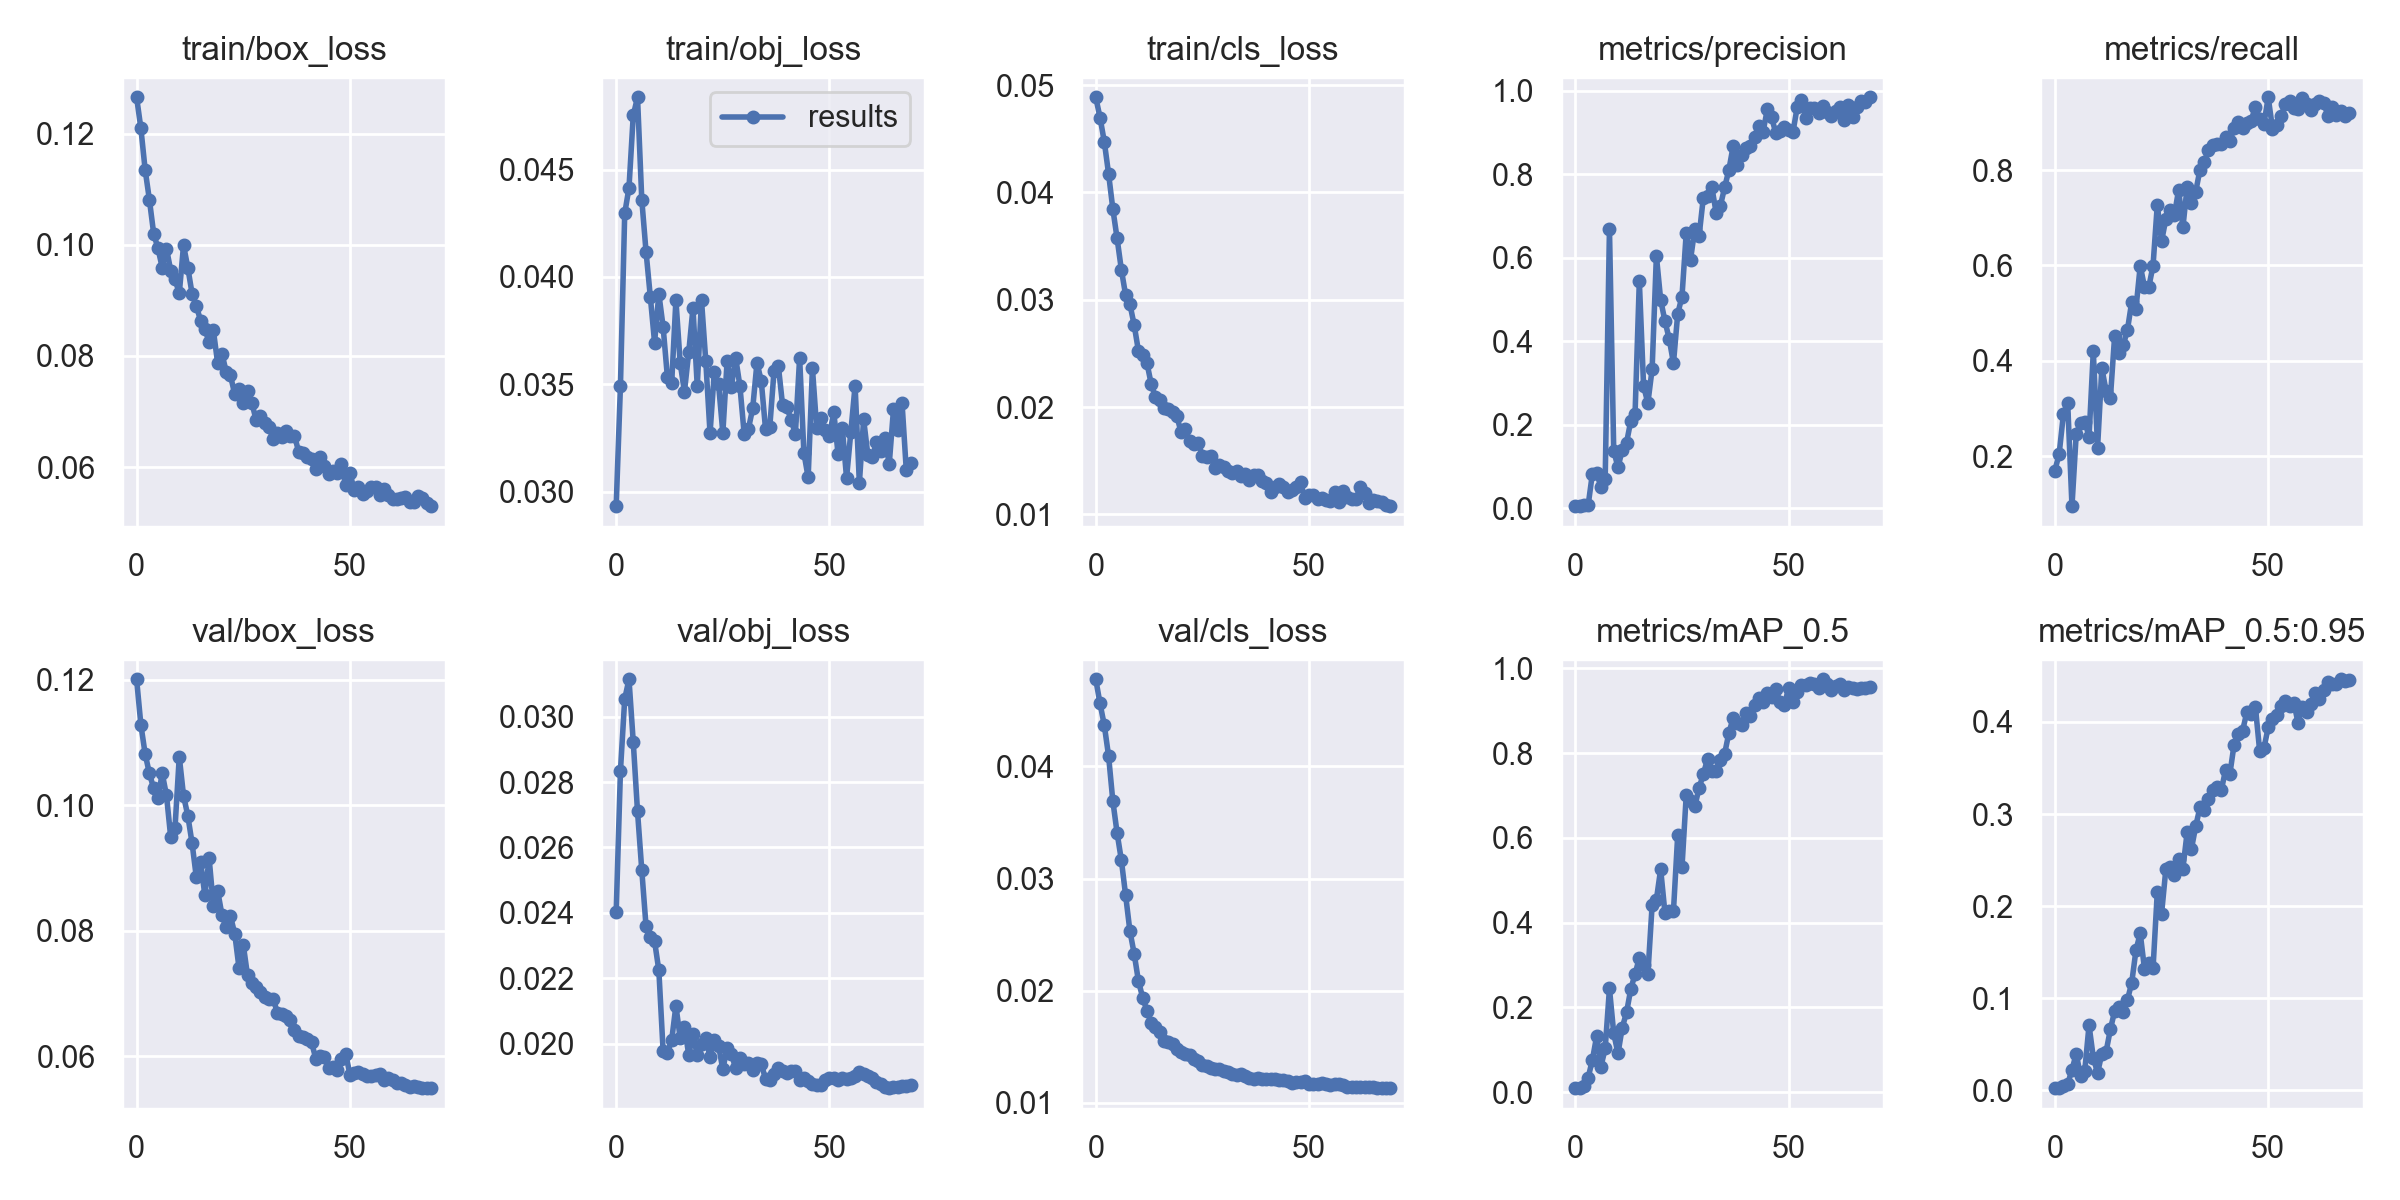

In [49]:
Image(filename='runs/train/exp/results.png', width=1000)

### * Confusion matrix

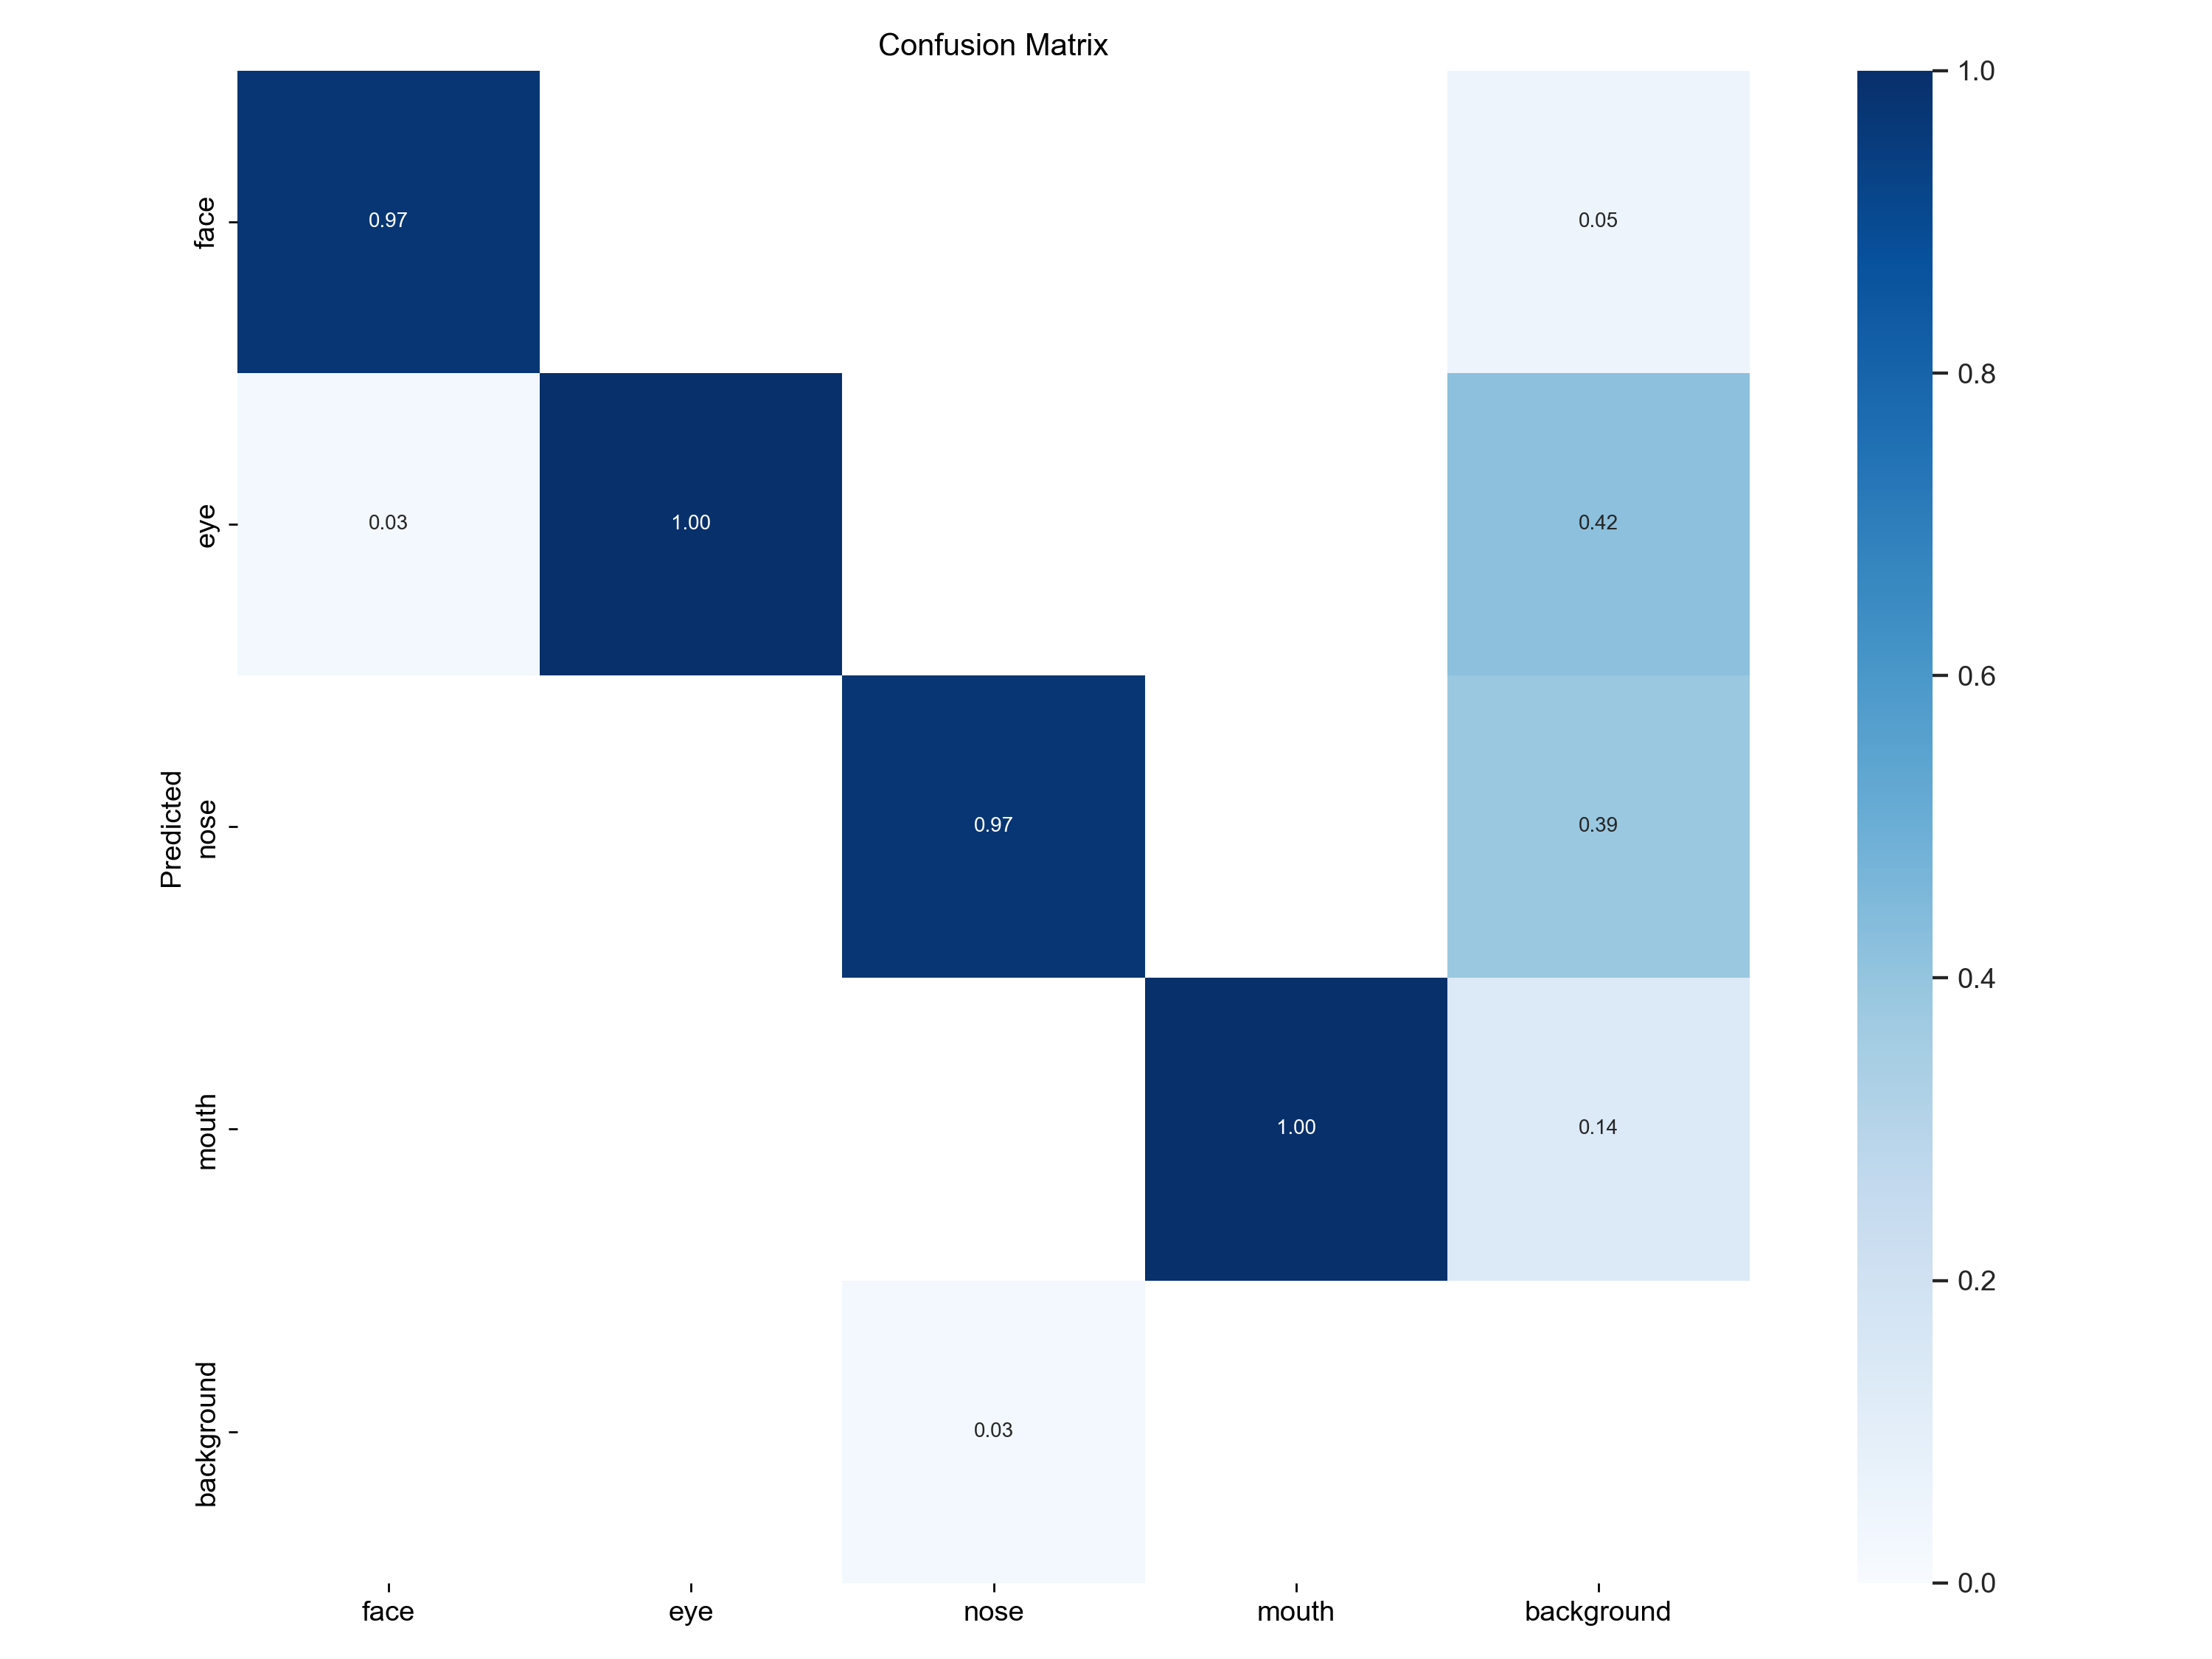

In [54]:
Image(filename='runs/train/exp/confusion_matrix.png', width=600)

### * Precision-Recall graph

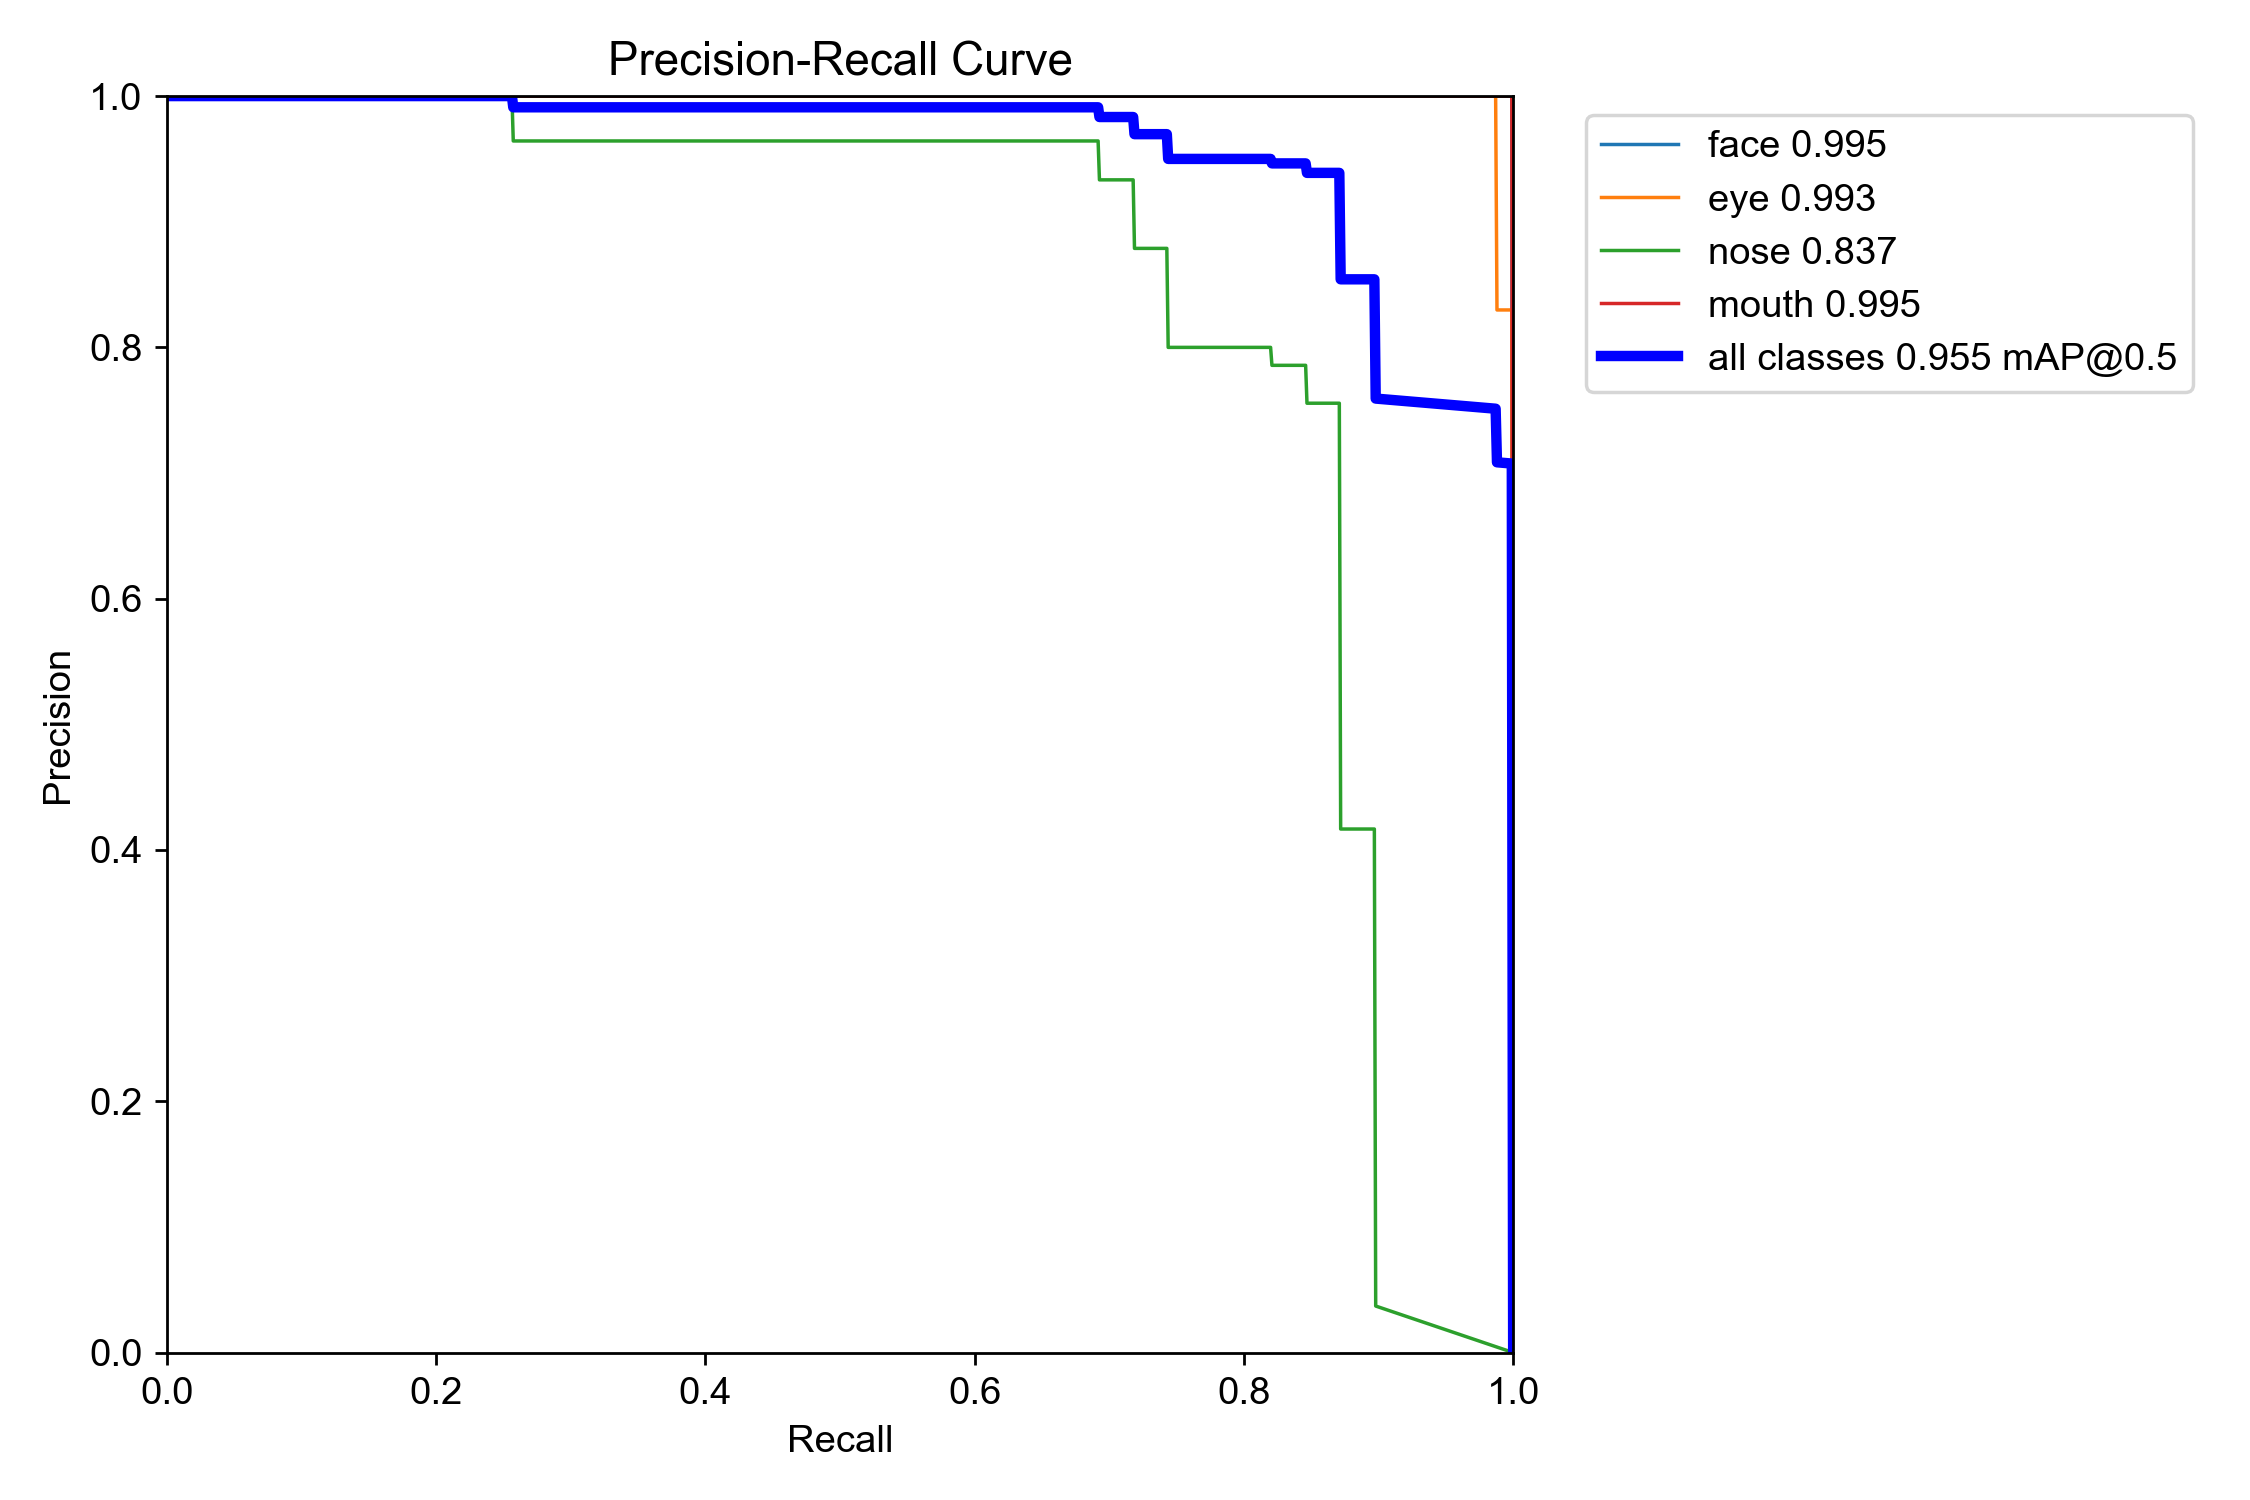

In [7]:
Image(filename='runs/train/exp/PR_curve.png', width=500)